# Import Packages and Load Dataset

In [1]:
import nengo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib widget

from matplotlib import cm
from scipy.stats import gennorm
from IPython import display
from TacSet import TacSet


# Load dataset
streams = np.load('touch_stream.npz')
[sSharp, sRound, sPlateau] = [streams[file] for file in streams.files]
labels = ['sharp', 'round', 'plateau']

# Visualize Dataset

In [2]:
frames = np.min([len(sSharp), len(sRound), len(sPlateau)])

# Visualize data steam
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=100)
im0 = axs[0].imshow(sSharp[0])
im1 = axs[1].imshow(sRound[0])
im2 = axs[2].imshow(sPlateau[0])
def update(frame):
    im0.set_data(sSharp[frame])
    im1.set_data(sRound[frame])
    im2.set_data(sPlateau[frame])
    return [im0, im1, im2]
anim = animation.FuncAnimation(fig=fig, func=update, frames=frames, interval=30, blit=True, repeat=False)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()  

# Generalized Gaussian Spiking Encoding for Tactile Sensors

/tmp/ipykernel_2259/3195730635.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


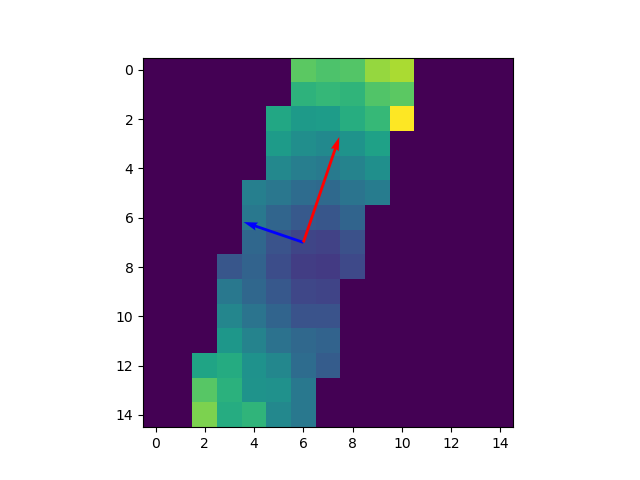

In [119]:
from sklearn.decomposition import PCA

tacset = TacSet([sSharp, sRound, sPlateau], labels)
sample = tacset[4180]
pca = PCA(n_components=2)
mat = -sample[0]
mat = (mat - np.min(mat))/np.std(mat)
x, y = np.where(mat > np.mean(mat))
X = np.squeeze(np.dstack((x, y)))
x0, y0 = np.ceil(np.mean(X, axis=0))
pca.fit(X)
V = pca.components_
a = np.sqrt(pca.singular_values_)
V[0, :] *= a[1]
V[1, :] *= a[0]
origin = np.array([[y0, y0],[x0, x0]])
plt.close()
plt.figure()
plt.imshow(mat)
plt.quiver(*origin, V[:,0], V[:,1], color=['b','r'], scale=21)
plt.show()